In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('price_banglore.csv')
df.sample(5)

,area,bedrooms,price
5,1170,2,38.0
4,1200,2,51.0
19,800,1,32.0
7,3300,4,155.0
10,1800,3,82.0


In [3]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler() 
X = df.iloc[:,:-1]
y = df.price

sx_scale = sx.fit_transform(X)
sy_scale = sy.fit_transform(y.values.reshape(y.shape[0],1))

In [4]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    no_of_features = X.shape[1]
    w = np.ones(shape = (no_of_features))
    b = 0
    n = len(X)
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicted = np.dot(w,X.T) + b        # weighted sum of input features
        w_grad = -(2/n)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/n)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list

w, b, cost, cost_list,epoch_list = batch_gradient_descent(sx_scale,sy_scale.reshape(sy_scale.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

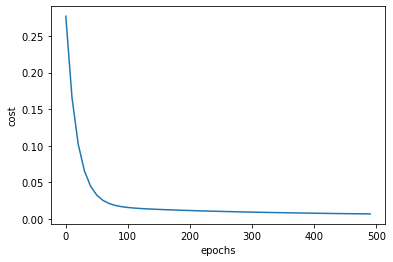

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [6]:
sx.transform([[2600,4]])

array([[0.62068966, 0.75      ]])

In [7]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

128.45484403267596

# Stochastic Gradient Descent

In [8]:
import random 
random.randint(0,6)

0

In [9]:
def Stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    no_of_features = X.shape[1]
    w = np.ones(shape = (no_of_features))
    b = 0
    n = len(X)
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0,n-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w,sample_x.T)+b
        
        w_grad = (-2/n)*np.dot(sample_x.T,(sample_y-y_predicted))
        b_grad = (-2/n)*(sample_y-y_predicted)
        
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = (sample_y - y_predicted)**2
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list

In [10]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = Stochastic_gradient_descent(sx_scale,sy_scale.reshape(sy_scale.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70617732, 0.67545896]), -0.2305689481461311, 0.0019811656126124022)

In [11]:
w, b

(array([0.70712464, 0.67456527]), -0.23034857438407427)

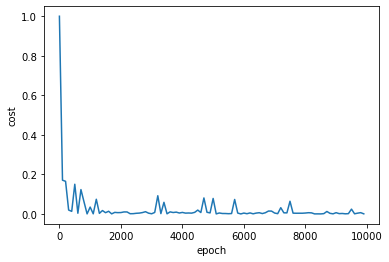

In [12]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [13]:
predict(2600,4,w_sgd, b_sgd)

128.43620053647035